<a href="https://colab.research.google.com/github/Dashnyam7/scikit-learn/blob/main/Classifiaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification by Support Vector Machine

## What is support vector machine?

A support vector machine (SVM) is an algorithm that can be used for classification and regression analysis as well as outlier detection.

## Data set preperation

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(123)
df1 = pd.DataFrame({"x": np.random.uniform(size=50), "y": np.random.uniform(size=50), "target" : np.repeat(0, 50)})
df2 = pd.DataFrame({"x": np.random.uniform(-1, 0, size=50), "y": np.random.uniform(-1, 0, size=50), "target": np.repeat(1, 50)})
df = pd.concat([df1, df2], ignore_index=True)
df

,x,y,target
0,0.696469,0.120629,0
1,0.286139,0.826341,0
2,0.226851,0.603060,0
3,0.551315,0.545068,0
4,0.719469,0.342764,0
...,...,...,...
95,-0.246474,-0.364100,1
96,-0.258138,-0.967802,1
97,-0.951421,-0.255219,1
98,-0.291303,-0.527087,1


In [ ]:
data0 = df.query('target==0').loc[:,["x", "y"]].values
target0 = df.query('target == 0').loc[:, "target"].values
data1 = df.query('target == 1').loc[:, ["x", "y"]].values
target1 = df.query('target == 1').loc[:, "target"].values
data0.shape

(50, 2)

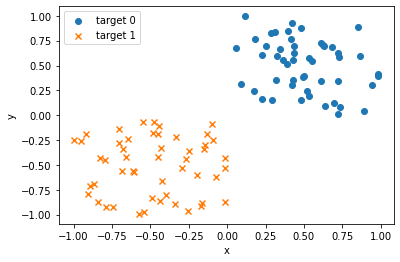

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data0[:, 0], data0[:, 1], marker="o", label='target 0')
ax.scatter(data1[:, 0], data1[:, 1], marker="x", label='target 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

## Learning

In [ ]:
from sklearn.svm import SVC

In [ ]:
def plot_boundary_margin_sv(data0, target0, data1, target1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1):
    svc = SVC(kernel=kernel, C=C)  # <-- 1
    svc.fit(np.vstack((data0, data1)), np.hstack((target0, target1)))  # <-- 2
    # 3
    fig, ax = plt.subplots()
    ax.scatter(data0[:, 0], data0[:, 1], marker="o", label='target 0')
    ax.scatter(data1[:, 0], data1[:, 1], marker="x", label='target 1')
    # 4
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=[':', '-', ':'])
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=250, facecolors='none', edgecolors='red') # <-- 5

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()

1.Support vector machine instantiation
2.training run
3.Scatter Plot
4.Plot decision boundaries and margins
5.Support vector markup

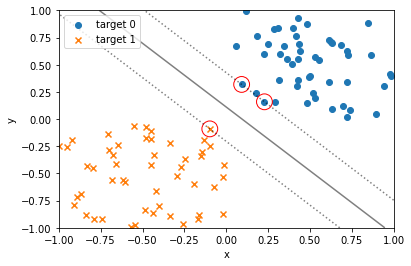

In [ ]:
plot_boundary_margin_sv(data0, target0, data1, target1, kernel='linear', C=1e6)

C- ni marginii hemjeeg uurchilj bna


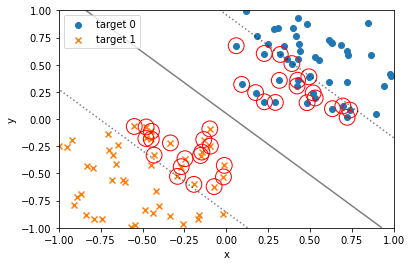

In [ ]:
plot_boundary_margin_sv(data0, target0, data1, target1, kernel='linear', C=0.1)

### Classification by curve

In [ ]:
np.random.seed(123)
data = np.random.uniform(size=(50, 2))
target = (data[:, 1] > 2*(data[:, 0]-0.5)**2 + 0.5).astype(int)

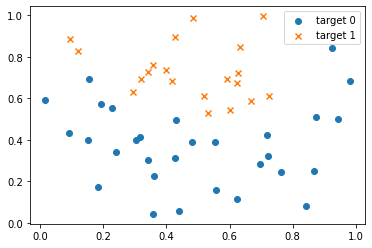

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data[target == 0, 0], data[target == 0, 1], marker="o", label='target 0') # <-- 1
ax.scatter(data[target == 1, 0], data[target == 1, 1], marker="x", label='target 1') # <-- 2
ax.legend()
plt.show()

Plot data for $y>2(x-0.5)^2+0.5$ target 1as classes
Plot the data at $y\leq2(x-0.5)^2+0.5$ target 0as classes

In [ ]:
data0, data1 = data[target == 0, :], data[target == 1, :]
target0, target1 = target[target == 0], target[target == 1]

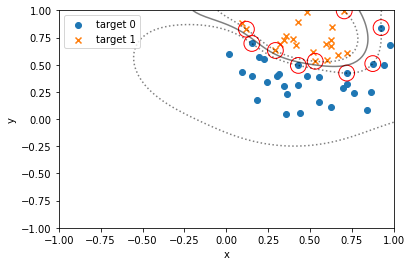

In [ ]:
plot_boundary_margin_sv(data0, target0, data1, target1, kernel='rbf', C=1e6)

kernel=rbf--> curve uusgene

the drawing range of the scatter plot is wide and the results are difficult to see.
This is the effect of plot_boundary_margin_svbeing the default value ofxmin=-1ymin=-1

In [ ]:
def plot_boundary_margin_sv(data0, target0, data1, target1, kernel,C, xmin=-1, xmax=1, ymin=-1, ymax=1):
    svc = SVC(kernel=kernel, C=C)  # <-- 1
    svc.fit(np.vstack((data0, data1)), np.hstack((target0, target1)))  # <-- 2
    # 3
    fig, ax = plt.subplots()
    ax.scatter(data0[:, 0], data0[:, 1], marker="o", label='target 0')
    ax.scatter(data1[:, 0], data1[:, 1], marker="x", label='target 1')
    # 4
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=[':', '-', ':'])
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=250, facecolors='none', edgecolors='red') # <-- 5

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()

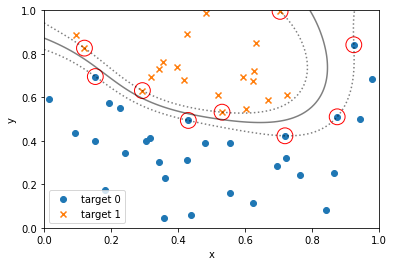

In [ ]:
plot_boundary_margin_sv(data0, target0, data1, target1, kernel='rbf', C=1e6, xmin=0, ymin=0)


# Classification by Decision Tree

## What is decision tree?

A decision tree is an algorithm that predicts outcomes by classifying data according to stepwise conditions

### Decision tree idea

When classifying using a decision tree, it is necessary to decide which feature value to split based on where

The accuracy of classification is judged by the impurity

information gain = parent node impurity - total child node impurity

When the information gain is positive: Since the impurity of the parent node is larger than the sum of the impurities of the child nodes, the impurity is reduced by dividing by the child nodes.

Negative information gain: Since the impurity of the parent node is smaller than the sum of the impurities of the child nodes, the impurity is lower if the child nodes are not divided.

Impurity indicators include Gini impurity , entropy , and classification error

### Gini impurity

Gini impurity represents the probability that each node will give an incorrect classification.
For example, suppose there are class A and class B as classification destinations for a node.
Suppose the probability of being in class A is 0.7 and the probability of being in class B is 0.3.
In this case, the Gini impurity can be calculated as

Probability of being wrongly classified into class A: $0.7\times0.3=0.21$ Probability
of being wrongly classified into class B: $0.3\times0.7=0.21$

Gini Impurity: $0.21+0.21=0.42$

## Data set preperation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
data, target = iris.data, iris.target
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=123, test_size=0.2)

## Learning

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(max_depth=3)

In [ ]:
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=3)

## Visualization of learning result

The training result of the decision tree model *pydotplus* can be visualized by using the module

In [ ]:
pip install pydotplus


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To visualize the learning result of the decision tree model, first extract the learning data in dot format using treethe function of the scikit-learn module . Then, by passing the extracted learning data to the function of the module, it is converted into an object representing the graph. This is output as image data by the method. If you put these processes into code, you can write it as follows.***export_graphviz***
pydotplus ***graph_from_dot_data***
***write_png***

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolor', 'Virginica'], feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

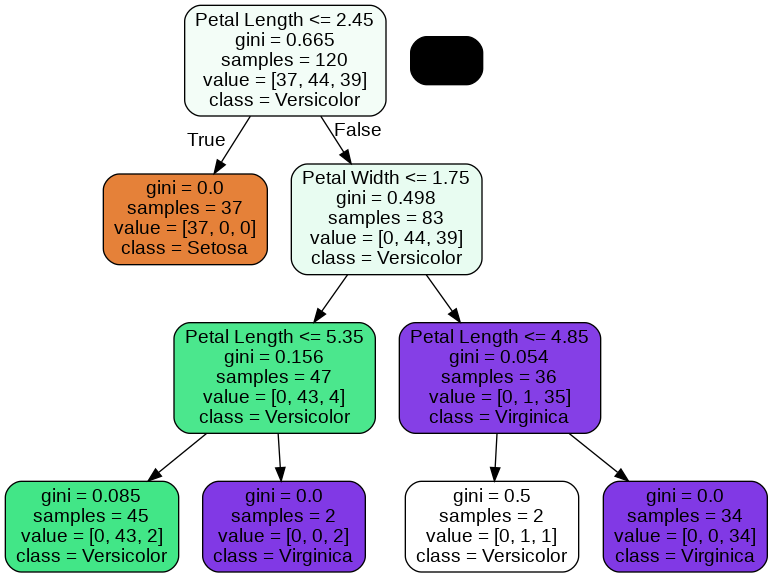

In [ ]:
from IPython.display import Image
Image('tree.png')

## Forecast

By passing a dataset to the method as shown below, the result of classification prediction is returned.predict
***predict***

In [ ]:
target_pred = tree.predict(data_test)
target_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0])

In [ ]:
target_test

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0])

# Classification by Random Forest

## What is Random Forest

Random forest randomly selects features (explanatory variables) from the training data set, builds decision trees using those features, and repeats the process of learning. This is an analysis method that performs classification and regression using the most common values ​​and the average value from the estimation results.
These randomly selected features are called **bootstrap data**

This kind of learning method using multiple learners is called ensemble learning 

## Data set preperation

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
data, target = iris.data, iris.target
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=123, test_size=0.2)

## Learning

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
forest = RandomForestClassifier(n_estimators=100, random_state=123)

In [7]:
 forest.fit(data_train, target_train)

## Forecast

In [5]:
y_pred = forest.predict(data_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0])

In [12]:
target_test

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0])